In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
# Step 2: Load and Explore Data
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
print("Data Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Data Shape: (887, 8)

First 5 rows:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
# Step 3: Preprocessing
# Select relevant features
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
         'Parents/Children Aboard', 'Fare']]

In [7]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [8]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [9]:
# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [10]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Step 6: Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [13]:
# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [14]:
# Step 8: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7640449438202247

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       166
           1       0.73      0.60      0.66       101

    accuracy                           0.76       267
   macro avg       0.75      0.73      0.74       267
weighted avg       0.76      0.76      0.76       267



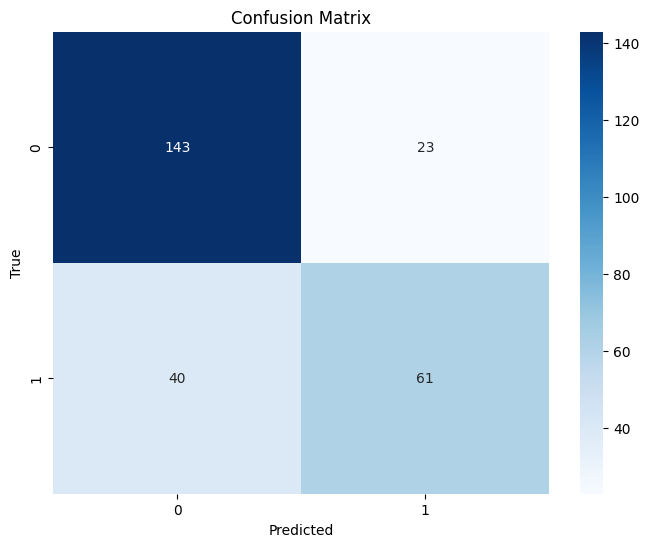

In [15]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

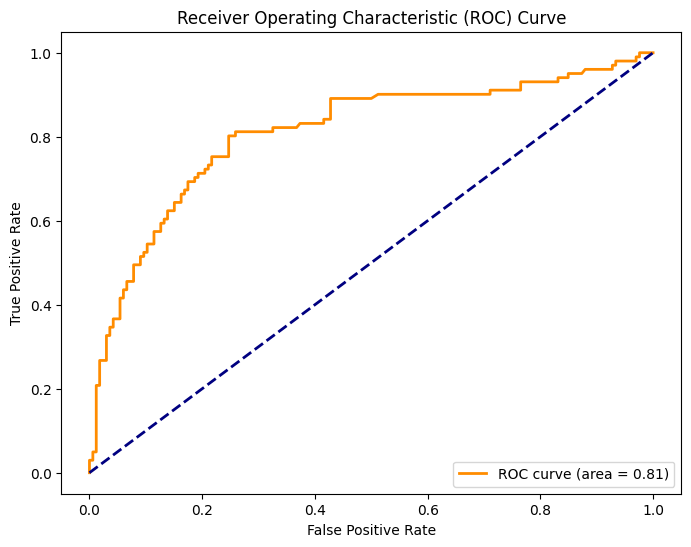

In [16]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<ipython-input-17-1a67dbeebbcd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


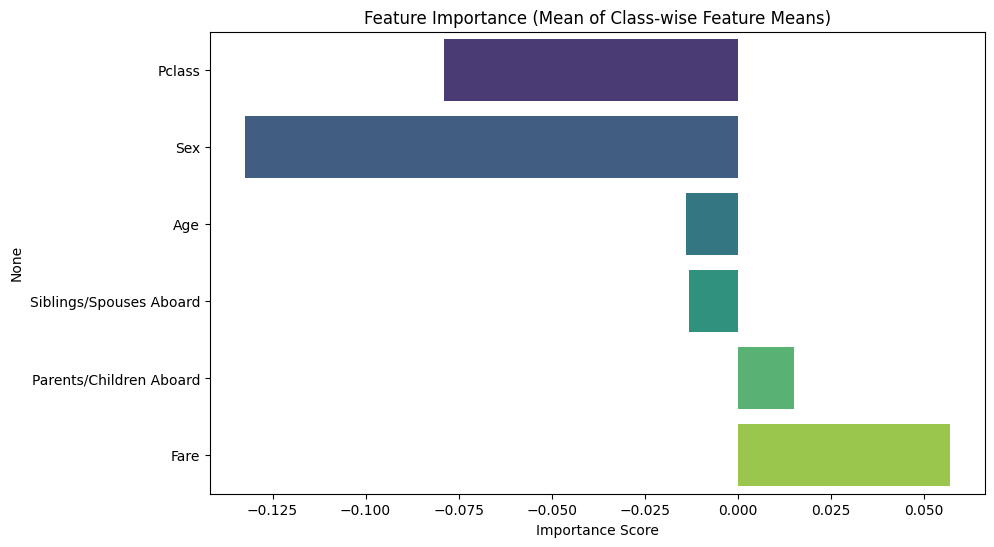

In [17]:
# Step 9: Feature Importance Visualization
feature_importance = model.theta_.mean(axis=0)  # Mean of feature means across classes
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title('Feature Importance (Mean of Class-wise Feature Means)')
plt.xlabel('Importance Score')
plt.show()